<a href="https://colab.research.google.com/github/sylkip3/Applied-Machine-Learning/blob/main/task4_cancer_clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 4 – Clustering & PCA on the Cancer Dataset
### Task 4.1: K-Means & Hierarchical Clustering | Task 4.2: PCA

In [ ]:
# --- Import all required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Step 1: Load Dataset

In [ ]:
# Load the cancer dataset
df = pd.read_csv('cancer.csv')

# no encoding needed
# Save the Diagnosis column separately for PCA visualisation
diagnosis = df['Diagnosis'].copy()   # M = Malignant, B = Benign

print(f'Dataset shape: {df.shape}')
print(f'Class distribution:\n{diagnosis.value_counts()}')
df.head()

Dataset shape: (569, 31)
Class distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


Step 2: Column Selection for Clustering

Three columns are delected: **radius1** (mean radius), **texture1** (mean texture), and **concavity1** (mean concavity).

In [ ]:
# three columns selected for clustering
cols = ['radius1', 'texture1', 'concavity1']
X_cluster = df[cols].copy()

# Normalisation of the three features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
print('Selected columns:', cols)

Selected columns: ['radius1', 'texture1', 'concavity1']


---
## TASK 4.1 – K-Means Clustering

### Elbow Method to Find Optimum k

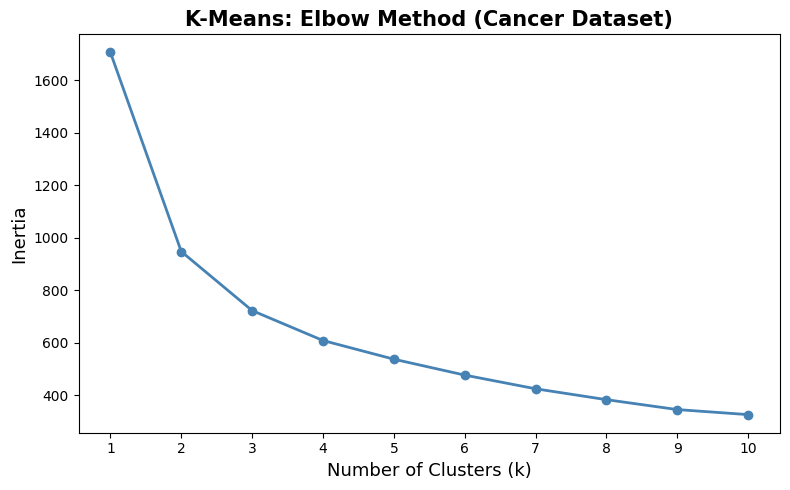

In [ ]:
# Run K-Means for k=1 to 10 and record inertia (within-cluster sum-of-squares)
inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot elbow curve — optimal k is where inertia stops dropping sharply
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', color='steelblue', linewidth=2)
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.title('K-Means: Elbow Method (Cancer Dataset)', fontsize=15, fontweight='bold')
plt.xticks(k_range)
plt.tight_layout()
plt.show()

Based on the elbow curve, **k = 2** is the natural choice — this aligns with the two known classes in the dataset (Malignant and Benign).

In [ ]:
# --- Apply K-Means with optimal k=2 ---
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f'Inertia: {kmeans.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}')

Inertia: 947.74
Silhouette Score: 0.4398


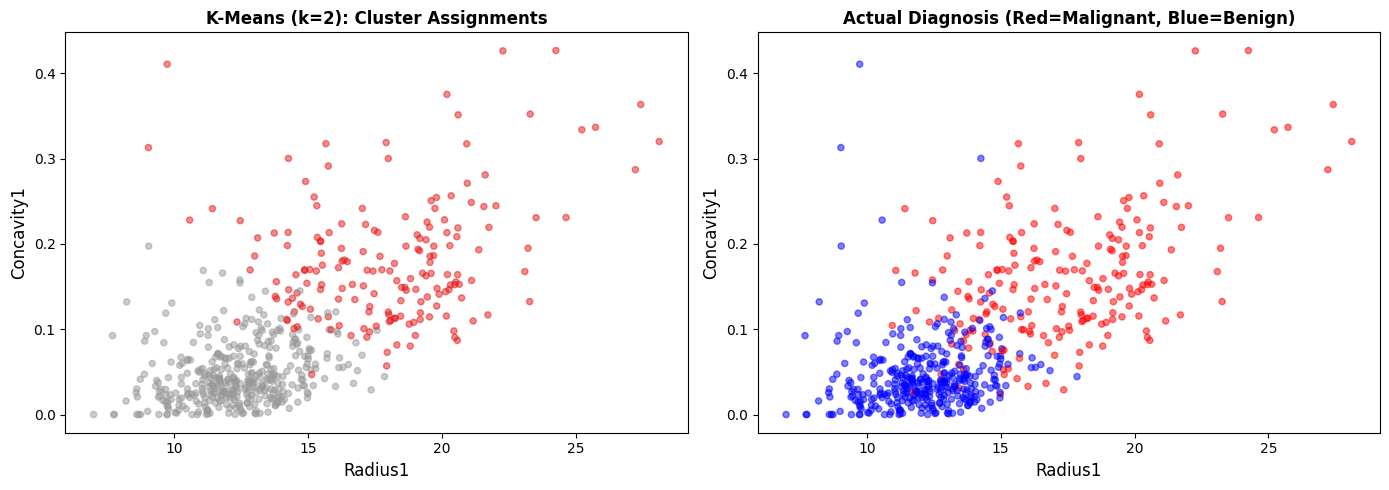

In [ ]:
# --- Visualise K-Means clusters (radius1 vs concavity1) ---
# Points are coloured by cluster; markers show actual diagnosis for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: K-Means cluster assignments
axes[0].scatter(X_cluster['radius1'], X_cluster['concavity1'],
                c=kmeans_labels, cmap='Set1', alpha=0.5, s=20)
axes[0].set_xlabel('Radius1', fontsize=12)
axes[0].set_ylabel('Concavity1', fontsize=12)
axes[0].set_title(f'K-Means (k={optimal_k}): Cluster Assignments', fontweight='bold')

# Right: Actual Diagnosis labels for comparison
colors_true = ['red' if d == 'M' else 'blue' for d in diagnosis]
axes[1].scatter(X_cluster['radius1'], X_cluster['concavity1'],
                c=colors_true, alpha=0.5, s=20)
axes[1].set_xlabel('Radius1', fontsize=12)
axes[1].set_ylabel('Concavity1', fontsize=12)
axes[1].set_title('Actual Diagnosis (Red=Malignant, Blue=Benign)', fontweight='bold')

plt.tight_layout()
plt.show()

---
### Hierarchical (Agglomerative) Clustering

The **Silhouette Score** is used to find the optimal number of clusters since hierarchical clustering has no inertia objective function.

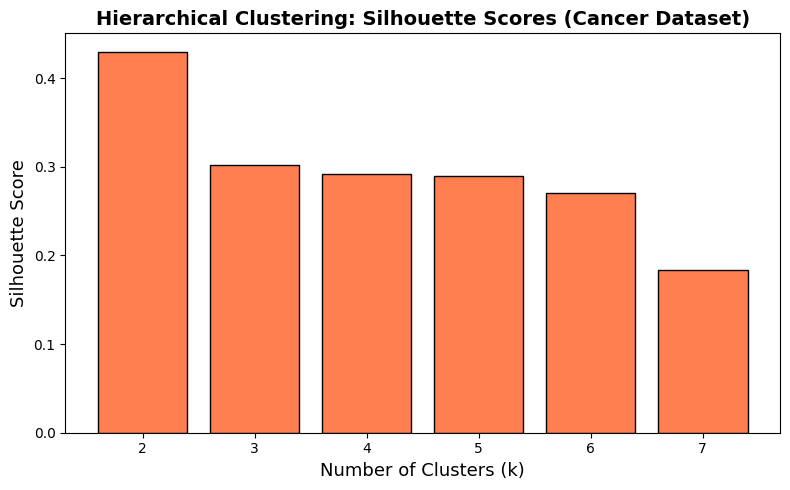

Optimal k (Hierarchical): 2
Best Silhouette Score: 0.4293


In [ ]:
# --- Silhouette Score method for Hierarchical Clustering ---
sil_scores = []
k_range_hc = range(2, 8)

for k in k_range_hc:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores — highest bar = optimal k
plt.figure(figsize=(8, 5))
plt.bar(list(k_range_hc), sil_scores, color='coral', edgecolor='black')
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.title('Hierarchical Clustering: Silhouette Scores (Cancer Dataset)', fontsize=14, fontweight='bold')
plt.xticks(list(k_range_hc))
plt.tight_layout()
plt.show()

optimal_hc_k = list(k_range_hc)[sil_scores.index(max(sil_scores))]
print(f'Optimal k (Hierarchical): {optimal_hc_k}')
print(f'Best Silhouette Score: {max(sil_scores):.4f}')

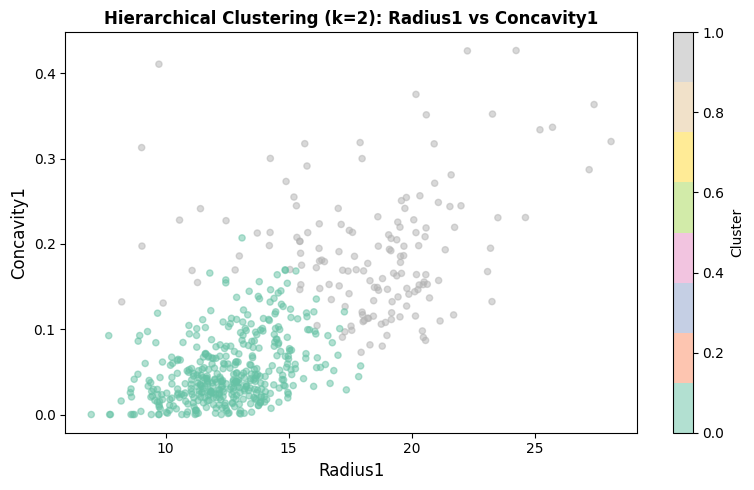

In [ ]:
# --- Apply Hierarchical Clustering with optimal k ---
# Ward linkage minimises the variance of the clusters being merged
hc = AgglomerativeClustering(n_clusters=optimal_hc_k, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Visualise
plt.figure(figsize=(8, 5))
plt.scatter(X_cluster['radius1'], X_cluster['concavity1'],
            c=hc_labels, cmap='Set2', alpha=0.5, s=20)
plt.xlabel('Radius1', fontsize=12)
plt.ylabel('Concavity1', fontsize=12)
plt.title(f'Hierarchical Clustering (k={optimal_hc_k}): Radius1 vs Concavity1', fontweight='bold')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

---
## TASK 4.2 – Principal Component Analysis (PCA)

All 30 features are already numerical, so no encoding is needed. We simply:
1. **Remove** the `Diagnosis` column (unsupervised — label must not be used)
2. **Normalise** all features (PCA is scale-sensitive)
3. Apply `PCA(n_components=2)` and plot coloured by actual diagnosis

In [ ]:
# --- Prepare data for PCA ---
# Target column dropped. PCA is unsupervised
X_pca_input = df.drop(columns=['Diagnosis'])

# Normalise all 30 features before PCA
# Fitting on the full dataset is correct here (no train/test split needed for PCA)
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca_input)

print(f'Mean after scaling: {np.mean(X_pca_scaled):.4f}  (should be ~0)')
print(f'Std after scaling:  {np.std(X_pca_scaled):.4f}  (should be ~1)')

Mean after scaling: -0.0000  (should be ~0)
Std after scaling:  1.0000  (should be ~1)


In [ ]:
# --- Apply PCA: extract first two principal components ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_scaled)

# Store in a DataFrame — mirrors the lecture exercise format
X_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])

print(f'Explained variance ratio: {pca.explained_variance_ratio_.round(4)}')
print(f'Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%')
X_df

Explained variance ratio: [0.4427 0.1897]
Total variance explained: 63.24%


,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


<Figure size 640x480 with 0 Axes>

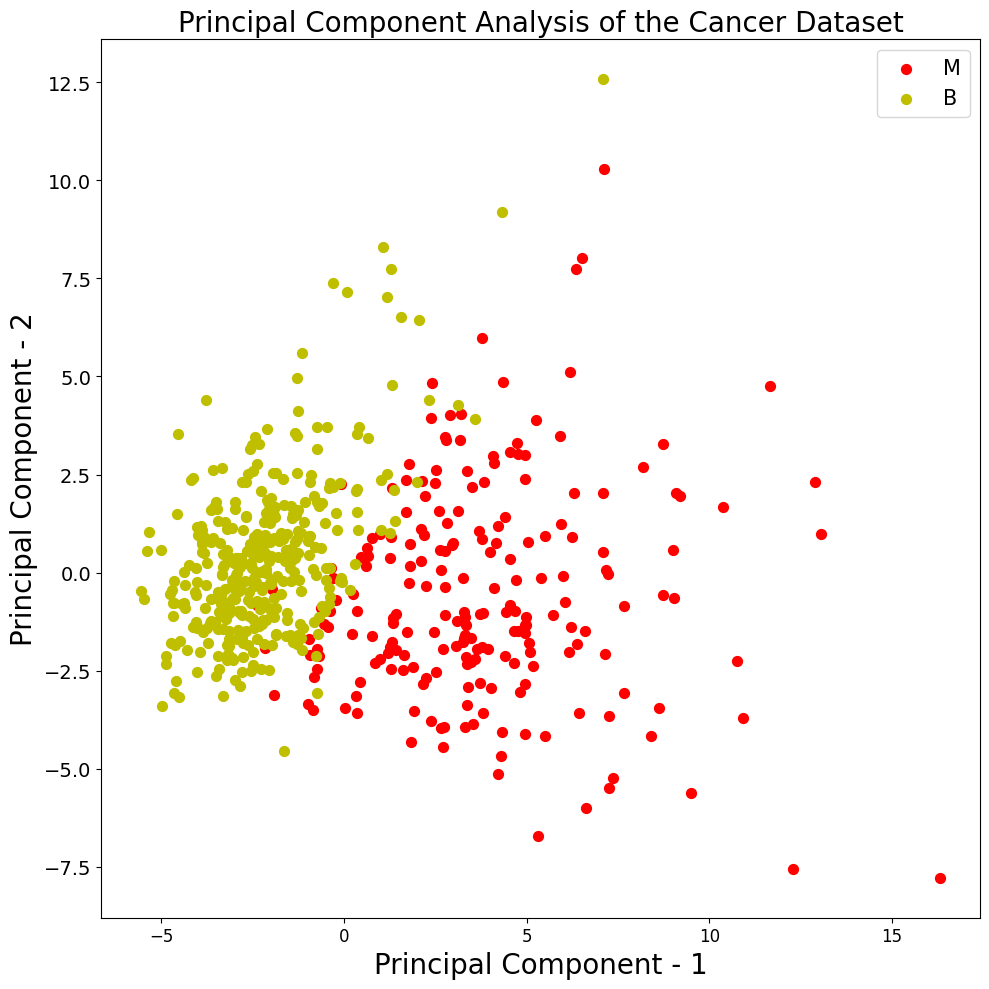

In [ ]:
# --- Scatter plot: PCA components coloured by Diagnosis ---
# Follows the same format as the Lecture 4 exercise notebook
plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title('Principal Component Analysis of the Cancer Dataset', fontsize=20)

targets_Diagnosis = ['M', 'B']
colors = ['r', 'y']

for target, color in zip(targets_Diagnosis, colors):
    indicesToKeep = diagnosis == target
    plt.scatter(X_df.loc[indicesToKeep, 'principal component 1'],
                X_df.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50)

plt.legend(targets_Diagnosis, prop={'size': 15})
plt.tight_layout()
plt.show()

---
 WORKSHOP 4 REPORT ON CANCER DATASET


Step 1: Data Loading
Dataset was loaded for processing.
total rows=569
total columns= 30
Target column=Diagnosis(M for Malignant and B Benign)
No encoding was required.


Step 2: Feature Selection for Clustering (Task 4.1)
Three clinically meaningful numerical columns were selected: **radius1** (mean radius of the nucleus), **texture1** (mean texture/surface variation), and **concavity1** (mean severity of concave portions of the contour). These features were chosen because they directly reflect the physical characteristics used to distinguish malignant from benign tumours. All three were standardised using `StandardScaler` before clustering to ensure equal contribution to distance calculations.


Step 3: K-Means Clustering
Elbow method: computes distortion or inertia for different k values and plots them. Elbow method applied for K=1-10, K=2 is the point where inertia curve appeared and aligns with dataset classes Malignant or Benign
Algorithm recovers underlying class structure from raw features alone without knowing the labels.


Step 4: Hierarchical Clustering
**Silhouette Score** is used to identify the optimal k since there is no inertia objective for hierarchical clustering. The optimal k was chosen from the highest silhouette score across k = 2 to 7. Ward linkage method used to minimise variance within clusters being merged.


Step 5: PCA (Task 4.2)
No encoding required(all 30 features are numerical).Diagnosis column which is the target was removed as it is the target(Y) and should not influence unsupervised transformation.PCA is sensitive to feature scaling so features were standardised and to also avoid larger-ranged features dominating the principal components. PCA application  with `n_components=2`, projecting the 30-dimensional space into 2 dimensions.

Results
Based on the PCA scatter plot there is a **clear separation** between Malignant (red) and Benign (yellow) cases along the first principal component.
This is a much cleaner, indicating the that the 30 engineered biopsy features are highly discriminative. The first two principal components together capture a substantial proportion of the total variance, confirming that the dataset has strong underlying structure that both PCA and clustering can effectively reveal.